## Random Forest - Support Vector - Neural Network Model Accuracy Score comparison using Wine dataset.

### Import Required Packages

In [131]:
#Basic Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Packages for various Machine Learning Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neural_network import MLPClassifier

#Performance related Packages
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
%matplotlib inline

In [92]:
#Loading Data into dataframe 'wine'
wine = pd.read_csv('winequality-red.csv',sep=',')

In [93]:
#To print the first 5 rows of the wine data frame
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Here the wine data set contains 12 columns. It contains 11 features columns(Independent columns) and quality column as target(dependent variable.)

#### Analysis of the data set

In [94]:
#Returns the number of rows and columns of the dataframe
wine.shape

(1599, 12)

In [95]:
#To return the detailed informaton about the dataframe
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [96]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [97]:
wine.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

#### The above information gives that dataframe was not containing any null values. So there is no need to perform the cleaning operation in the given dataset.

### Preprocessing Data

Preprocessing data will replace the wine quality values by labels defined as bad or good.

In [98]:
bins = (2,6.5,8)
group_names = ['bad','good']
wine['quality'] = pd.cut(wine['quality'], bins = bins, labels = group_names)

The wine quality now fall under two categories.It may either good or bad

In [100]:
wine['quality'].unique()

['bad', 'good']
Categories (2, object): ['bad' < 'good']

In [101]:
wine['quality'].head()

0    bad
1    bad
2    bad
3    bad
4    bad
Name: quality, dtype: category
Categories (2, object): ['bad' < 'good']

In [102]:
wine['quality'].tail()

1594    bad
1595    bad
1596    bad
1597    bad
1598    bad
Name: quality, dtype: category
Categories (2, object): ['bad' < 'good']

Label Encoder replace the categorical value with a numeric value between 0 and the number of classes minus 1. Here we two classes as good or bad. So those categorical values will be replaced by 0 and 1.

In [104]:
label_quality = LabelEncoder()

wine['quality'] = label_quality.fit_transform(wine['quality'])

In [105]:
wine['quality'].head()

0    0
1    0
2    0
3    0
4    0
Name: quality, dtype: int32

In [106]:
wine['quality'].tail()

1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, dtype: int32

In [108]:
wine['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

From the above observations,wine dataset contains 1382 bad wine and 217 good wine. The count is represented as follows

C:\Users\dinesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='count'>

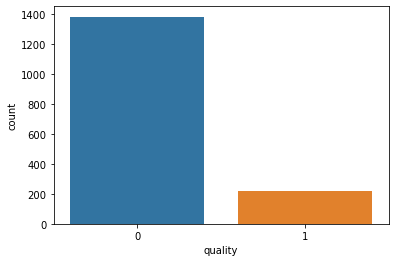

In [110]:
sns.countplot(wine['quality'])

### Variable Separation of Response Variable Vs. Feature Variable

In [112]:
X = wine.drop('quality',axis = 1)   #Independent Variable
y = wine['quality']                 #Dependent Variable

### Train and Test Splitting Data

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [114]:
X_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
493,8.7,0.690,0.31,3.0,0.086,23.0,81.0,1.00020,3.48,0.74,11.6
354,6.1,0.210,0.40,1.4,0.066,40.5,165.0,0.99120,3.25,0.59,11.9
342,10.9,0.390,0.47,1.8,0.118,6.0,14.0,0.99820,3.30,0.75,9.8
834,8.8,0.685,0.26,1.6,0.088,16.0,23.0,0.99694,3.32,0.47,9.4
705,8.4,1.035,0.15,6.0,0.073,11.0,54.0,0.99900,3.37,0.49,9.9


In [115]:
X_test.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
803,7.7,0.56,0.08,2.50,0.114,14.0,46.0,0.9971,3.24,0.66,9.6
124,7.8,0.50,0.17,1.60,0.082,21.0,102.0,0.9960,3.39,0.48,9.5
350,10.7,0.67,0.22,2.70,0.107,17.0,34.0,1.0004,3.28,0.98,9.9
682,8.5,0.46,0.31,2.25,0.078,32.0,58.0,0.9980,3.33,0.54,9.8
1326,6.7,0.46,0.24,1.70,0.077,18.0,34.0,0.9948,3.39,0.60,10.6


In [116]:
y_train.head()

493    0
354    0
342    0
834    0
705    0
Name: quality, dtype: int32

In [117]:
y_test.head()

803     0
124     0
350     0
682     0
1326    0
Name: quality, dtype: int32

### Applying Standard Scaling to get Optimized result

In [68]:
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test  = sc.transform(X_test)

In [118]:
type(X_train)

pandas.core.frame.DataFrame

In [119]:
X_train[:5]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
493,8.7,0.690,0.31,3.0,0.086,23.0,81.0,1.00020,3.48,0.74,11.6
354,6.1,0.210,0.40,1.4,0.066,40.5,165.0,0.99120,3.25,0.59,11.9
342,10.9,0.390,0.47,1.8,0.118,6.0,14.0,0.99820,3.30,0.75,9.8
834,8.8,0.685,0.26,1.6,0.088,16.0,23.0,0.99694,3.32,0.47,9.4
705,8.4,1.035,0.15,6.0,0.073,11.0,54.0,0.99900,3.37,0.49,9.9


In [120]:
X_test[:5]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
803,7.7,0.56,0.08,2.50,0.114,14.0,46.0,0.9971,3.24,0.66,9.6
124,7.8,0.50,0.17,1.60,0.082,21.0,102.0,0.9960,3.39,0.48,9.5
350,10.7,0.67,0.22,2.70,0.107,17.0,34.0,1.0004,3.28,0.98,9.9
682,8.5,0.46,0.31,2.25,0.078,32.0,58.0,0.9980,3.33,0.54,9.8
1326,6.7,0.46,0.24,1.70,0.077,18.0,34.0,0.9948,3.39,0.60,10.6


### Random Forest Classifier

In [72]:
rfc = RandomForestClassifier(n_estimators=200)   #How many Trees you needed

rfc.fit(X_train,y_train)

pred_rfc = rfc.predict(X_test)

In [73]:
pred_rfc[:5]

array([0, 0, 0, 0, 0])

In [74]:
X_test[:5]

array([[-3.61859850e-01,  1.64286407e-01, -9.85152962e-01,
        -3.86510130e-02,  5.18158057e-01, -1.81975648e-01,
        -1.99566462e-02,  1.75731759e-01, -4.65392578e-01,
        -1.34389336e-04, -7.77452782e-01],
       [-3.03840702e-01, -1.70525408e-01, -5.24491803e-01,
        -6.65728970e-01, -1.30756387e-01,  4.97010797e-01,
         1.68066777e+00, -4.17191190e-01,  5.08915214e-01,
        -1.03143815e+00, -8.72484283e-01],
       [ 1.37871461e+00,  7.78108067e-01, -2.68568937e-01,
         1.00699644e-01,  3.76208022e-01,  1.09018543e-01,
        -3.84376165e-01,  1.95450060e+00, -2.05577167e-01,
         1.83329452e+00, -4.92358280e-01],
       [ 1.02293339e-01, -3.93733284e-01,  1.92092221e-01,
        -2.12839335e-01, -2.11870693e-01,  1.56398950e+00,
         3.44462872e-01,  6.60850535e-01,  1.19192097e-01,
        -6.87670232e-01, -5.87389780e-01],
       [-9.42051337e-01, -3.93733284e-01, -1.66199791e-01,
        -5.96053642e-01, -2.32149269e-01,  2.06016607e-01,
  

In [75]:
#Let's See how our Model is performed

print(classification_report(y_test,pred_rfc))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94       273
           1       0.72      0.49      0.58        47

    accuracy                           0.90       320
   macro avg       0.82      0.73      0.76       320
weighted avg       0.89      0.90      0.89       320



In [76]:
print(confusion_matrix(y_test,pred_rfc))

[[264   9]
 [ 24  23]]


From the above Classification report Random Forest Classifier give 89% of accuray.

### Support Vector Model (SVM) Classifier

In [77]:
clf =  svm.SVC()
clf.fit(X_train,y_train)
pred_clf = clf.predict(X_test)

In [78]:
X_test[:5]

array([[-3.61859850e-01,  1.64286407e-01, -9.85152962e-01,
        -3.86510130e-02,  5.18158057e-01, -1.81975648e-01,
        -1.99566462e-02,  1.75731759e-01, -4.65392578e-01,
        -1.34389336e-04, -7.77452782e-01],
       [-3.03840702e-01, -1.70525408e-01, -5.24491803e-01,
        -6.65728970e-01, -1.30756387e-01,  4.97010797e-01,
         1.68066777e+00, -4.17191190e-01,  5.08915214e-01,
        -1.03143815e+00, -8.72484283e-01],
       [ 1.37871461e+00,  7.78108067e-01, -2.68568937e-01,
         1.00699644e-01,  3.76208022e-01,  1.09018543e-01,
        -3.84376165e-01,  1.95450060e+00, -2.05577167e-01,
         1.83329452e+00, -4.92358280e-01],
       [ 1.02293339e-01, -3.93733284e-01,  1.92092221e-01,
        -2.12839335e-01, -2.11870693e-01,  1.56398950e+00,
         3.44462872e-01,  6.60850535e-01,  1.19192097e-01,
        -6.87670232e-01, -5.87389780e-01],
       [-9.42051337e-01, -3.93733284e-01, -1.66199791e-01,
        -5.96053642e-01, -2.32149269e-01,  2.06016607e-01,
  

In [79]:
pred_clf[:5]

array([0, 0, 0, 0, 0])

In [80]:
print(classification_report(y_test,pred_clf))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       273
           1       0.71      0.26      0.37        47

    accuracy                           0.88       320
   macro avg       0.80      0.62      0.65       320
weighted avg       0.86      0.88      0.85       320



In [81]:
print(confusion_matrix(y_test,pred_clf))

[[268   5]
 [ 35  12]]


Support Vector Model (SVM) Classifier gives only 86% of accuracy. When it is compared with Random forest classifies it gives 3% less accuracy.

## Neural Network

In [82]:
mlpc = MLPClassifier(hidden_layer_sizes=(11,11,11))
mlpc.fit(X_train,y_train)
pred_mlpc = mlpc.predict(X_test)

C:\Users\dinesh\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [83]:
X_test[:5]

array([[-3.61859850e-01,  1.64286407e-01, -9.85152962e-01,
        -3.86510130e-02,  5.18158057e-01, -1.81975648e-01,
        -1.99566462e-02,  1.75731759e-01, -4.65392578e-01,
        -1.34389336e-04, -7.77452782e-01],
       [-3.03840702e-01, -1.70525408e-01, -5.24491803e-01,
        -6.65728970e-01, -1.30756387e-01,  4.97010797e-01,
         1.68066777e+00, -4.17191190e-01,  5.08915214e-01,
        -1.03143815e+00, -8.72484283e-01],
       [ 1.37871461e+00,  7.78108067e-01, -2.68568937e-01,
         1.00699644e-01,  3.76208022e-01,  1.09018543e-01,
        -3.84376165e-01,  1.95450060e+00, -2.05577167e-01,
         1.83329452e+00, -4.92358280e-01],
       [ 1.02293339e-01, -3.93733284e-01,  1.92092221e-01,
        -2.12839335e-01, -2.11870693e-01,  1.56398950e+00,
         3.44462872e-01,  6.60850535e-01,  1.19192097e-01,
        -6.87670232e-01, -5.87389780e-01],
       [-9.42051337e-01, -3.93733284e-01, -1.66199791e-01,
        -5.96053642e-01, -2.32149269e-01,  2.06016607e-01,
  

In [84]:
pred_mlpc[:5]

array([0, 0, 0, 0, 0])

In [85]:
print(classification_report(y_test,pred_mlpc))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       273
           1       0.71      0.51      0.59        47

    accuracy                           0.90       320
   macro avg       0.81      0.74      0.77       320
weighted avg       0.89      0.90      0.89       320



In [86]:
print(confusion_matrix(y_test,pred_mlpc))

[[263  10]
 [ 23  24]]


Neural Network model also gives 89% accuracy for wine dataset.

## Accuracy Score

In [87]:
from sklearn.metrics import accuracy_score

In [129]:
random_forest = accuracy_score(y_test,pred_rfc)
svm = accuracy_score(y_test,pred_clf)
neural =accuracy_score(y_test,pred_mlpc)
print('Random Forest Accuracy Score        :',random_forest)
print('Support Vector Model Accuracy Score :', svm)
print('Neural Network Accuracy Score       :',neural)

Random Forest Accuracy Score        : 0.896875
Support Vector Model Accuracy Score : 0.875
Neural Network Accuracy Score       : 0.896875


Conclusion : The above Accuracy score gives about the comparision of the Random Forest,Suppor Vector and Neral Network Model for the wine dataset.Random forest model and Neural Network model gives more accuary when compared to support vector model for this wine dataset.
